One major factor in a game of tetris is whether you recieve the I piece when your board is tetris ready. However, there is a limited period of time available for players to score that tetris without resorting to burning. As a drought continues The player's board state will increase in height, increasing the difficulty for the player.

The goal of this program is to simulate an an agressive player who stacks perfectly In order to find the ammount of times a player would be forced to burn, and how long a player would need to survive certain heights in order to be as efficient during a particular game.

The algorithm of the program takes a sequence and calculates the height over time. If the player is tetris ready, and they get an I piece, the height decreases by 4. Otherwise the height accumulates, and if the player would reach a height where it would be impossible to get the I piece to the well, the player must burn. The forced burn height is determined by playstyle and board speed. 

The current model is limited since I can't take into account bad sequences that may make burns necessary, it assumes that the player is playing perfectly flat, while its more likely that the player would slope, and it can't determine how many lines would be sacrificed by a burn, etc. With more data on average burns per board height, and comparing the height graph the model produces to a height graph of actual games, and accounting for other factors, I think this method of modeling may be usefull for assessing the difficulty the player had to face during a compettitive game.

In [45]:
'''things to modify: 
-a slope meter to account for more pieces being held at risky height
-output burn to tetris ratio per speed played
-height formula
-the droughts list only counts the I pieces used to score a tetris rather than the excess I pieces, which helps indicate ideal drought length for playstyle and speed
-the drought list currently looks at the distance between tetris scored, I also want to look at droughts that occur when tetris ready
-need to separate the stats by speed played, the different sections of the game bias the numbers such as excess I pieces
(excess I piece is an indicator of saturation, pieces not used for tetris but rather to build, only occurs at height < 4)
(if an I piece failed to be used for a tetris, if a saturated piece is nearby, it seems the game will preserve in shape rather than increase in height)
(an I piece is critical if, when missed, they result in a burn or increase in overall height)
(saturation is more common at higher speeds since players tend to play lower,
but players that can build higher and utilize those otherwise unused I pieces more critical)
-add in a burn periodically in relation to the average burn rate per speed and height in the average game
'''
import statistics as stat
import matplotlib.pyplot as plt
def optimal(sequence, lv = 18, well = "right"):
    initial = lv
    transition = lv*10 - 50
    quads = 0
    burns = 0
    heights = {lv:[]}
    bails = []#indices of tetris scored
    burnheight = {18:14,19:11,29:4} if well == "right" else {18:12,19:8,29:4}
    mustburn = False
    tetrisready = False
    height = 0 
    onboardcount = 0
    for i, s in enumerate(sequence):
        if quads*10 + burns*5 >= transition*2.5:
            if transition == 230:
                lv = 29
                transition = 4000
                heights[lv] = []
            else:
                lv = 19
                transition = 230
                heights[lv] = []
        height = int(onboardcount/2.25)
        heights[lv].append(height)
        tetrisready = onboardcount >= 9 #9/2.25 = 4 height
        mustburn = height >= burnheight[lv]
        if s == "I" and tetrisready:
            onboardcount -= 9
            mustburn = False
            quads += 1
            bails.append(i)
        elif mustburn:
            onboardcount -= 4
            burns += 1
        else:#don't need to burn and can't score a tetris currently
            onboardcount += 1
    print("tetris to burn ratio:", quads, burns)
    '''print("mean, median and mode heights")
    print(stat.mean(heights), stat.median(heights), stat.mode(heights))'''
    print("max height:",max(heights))
    print("tetris indices and excess I pieces:", len(bails), sequence[0:i].count("I") - sequence[0:10].count("I") - len(bails))
    droughts = []
    for i, x in enumerate(bails[1:]):
        droughts.append(x - bails[i] - 1)
    print("droughts: ", droughts)#droughts in this instance is the length of time tetris ready without an I piece
    print("mean, median and mode droughts:")
    print(stat.mean(droughts), stat.median(droughts), stat.mode(droughts))
    for x in heights.values():
        plt.plot(x)
        plt.show()
    if initial == 18:
        plt.plot(heights[18])
        plt.plot([x + len(heights[18]) for x in range(len(heights[19]))],heights[19])

In [53]:
#Harry Hongs lv 18  left well maxout
game1 = "ZTZZZJTITSSJOSZJSOTZSZSLZTSLOIJILZOLSIOIZSOTOZIIZOZLZOJIZLOLOSZOITOOTIOZLZOTZJOLTOOTLTJTIJLTLSOSIJSIOJTIJLJLIZIOZLOTOLJOLJTISZLTLIJISTSILIZLSTZSIZOTLIJSOLIZISLZJZTOZJOLTSSZJTOOZIJZZSJIZTSLIJTZIZJTZSTOSLIJTOSZJSLZJISOJSOZLSTILSJZZJZILSSSJOZISZJSZIJIZSLOZSJILSTIZJLLSSJITZJSOJSILTOTSJLOTLJZIZTZSITOTTLIJZSOTSOISISJLOTZJZLOJLJSITSIZJSJSJOTLSTISZSSZSJJLZIOZSZLSISZJLIJITOZJZLSLZJTLJSLOJZOSLTITLOITILILILSZSZJOILZZJLIJISOJTJLIOSOSLTJSLTSLJLSZLTZJZSTIZJZSZSSTJIZIJOZTIITZOTOSLJTSISTZILLZTOJSJOOJJZITSOLZLJOSIIJJTZIJSLJJTIOSJLSTIJLZIZSTOLTJOJ"
#thor maxout
game2 = "ZLTOIOZJSOOIZTOSTSIZTIOSZSTLOLOSSLZIJSTZTOLITSTLISOSZOISSTITLSJOIISOJJZOJTSLSLTLTLOILZLSLOOSZJJZIJSZZTIOJSZTSLSTZLZSTISOJIZTTTZTLTSJZLSJOOSZOITJOLJSOJLZLSJTZLTIOTZIJJSJTZOZTOOIOTIOLZOSZTZISSJZOLILZLOSLSOJSJJOJSIZJTLOIOJLTITIIJTOSTZSITSIJSJLZOTZIZIOSLTJOTOTJZTZTLOJLOZISOZIZLSTSJSZJSJJLZIOIJOTZLTIZTLOJJSLTLOOZSJSZOJJJLTLTSILJZJSILSJOLOJTSIOSTJZIILOJLTISIOILTLOLIZSTJTLJIIOJIZSOJILJSZLTOTJZLSITIZSJIJITZOTZLSZSZLOLSZOLZSSLZLZJTJSZOJSLJSTSJOILIJZTJSLIZJOLTJOZOTTZSISOJOSTTLTLIOJOZJLSZSOSOILTLZILTISLSZISZIJILSLZTOLSLIJOTZLIOIJTZTZTILTITISOTSJOJSSOOTSTILZLLTSTSJIOLOSOIZJIILSTZLTJILZSJTOLZSIJSJOSITLSTSJLZOSSLOITLJZLSTLJOLOTSSZ"
#hydrantdude overflow game
game3 = "TLIOSOTOLTSJIJITISJITSJSZTJSOISZLTOJILOSZTSZZTZOZJZJZJSLIOZLJTISSILOOJTSIJZZIZLSIOSLSZLISLIZISTZIIOZTTIOIOJTOSLOZJOIJZLJTOITOTZILLZJIOSITSTSTOZSTJSTOTIOSOLTSTZLOSIJITZOJILILSLJTSSISLSIOJOSOSILSJLLSJZILZTOZOZJLIIZTOJILZLOJZJSOZILZLJSSOZOSTSSJIZOITITZLZIOLOOTJSZZJOSILJZTLOIOLJSLZISOJZJIJTSLSTOSTISOJOZLTOSOIOSTOOSLJSTLISLSOTTITLTZOISLSOSLJLIJZJOSTOTISOJILSLLSLZSLLSTJSOIIOSLJIJOIOTOLJLTZILZOTITLOJTOSTSZILTITOSTOTIOTOOZTJOSIOSOZIJISTLLJSTSSZIZIZOLSZLSOIOTJZTSIZITIJZSIOOZZSOITSZLOSLOLZIZLJTITOJTIOLOOLZJJISIZIZITLILLLISJZOSIZISTSZLTZOJIZSJOTJISOSZJSSTITJILTZIJZTZISZJOZSJZISLTOJTISTITOITJOIJIOSLSTZJTZLJTZIJSOIJTZTJTLOJOTZJIJLILZITIOLOZIZLITSOTSTOTOZLOZILSIZSZTTLOJTSZSTZISZLZZTOLTSLJTOZSILTSLITOIZIJLLTIJITJTOJTLZSZIZTLOLSLJZIZTSOSLTJZSOTSILJLZILZIZSILISZSTZLZILIJOSOLIOJITZJOITIZOTZJTJILISJSJTZZJLJLJLZOSZJTITLTTZITSJOIJILIOOSISISLJOZIZTIJTIZSLILSOTIJZLTLTJTJTZISOIITOIOZJSTTOLTSJZSZTSITZSTJZJSZTSTZL"
#Jonas tetris 102 playing flat
game4 = "TIOLSZOIOOLOJOISJISTIZILTSZSTOZZILOZTSZLLIZOOTZLJLZLITLZSJISOTJSZIJTSJTLJTITIIOZJTZLIIOZTZSTLZSOJOTOLOIJIOZISZLTISJTJITZSJLSJLJSISOSTIJZLJOJZOITJIZLZLJOTSLITJSISOSLITSSLOZSZJTJISOZSZTSZLZSJITSOJSOZTZJTJSSLTSTOOTJSJOISSSLZIZOZTZLOIJTJTLSTSILZJLIOISZLTIOISOJOZLJOLTSISOTOLSJTLTOJZITZSZJITSLOLITLZTZISILTLSSZTSZLJTOISIZSZTSJSZSTZTISJTOSILSLTIJSJTIJSISTZSOISZOSLOJLSLOOITSLZSIJTLZOJSISOLOSOJLIJSILTOLZSTOOSZIOLSOLSIZLTJOJLTSJTLTLOZOITSIZOSTOLOJLTZLOTIJTISITILTLTZOSOOLTZOOJZLITOILTLLSZIOSZJZISZLJLZTZSZITSIITTOLISZTZITOOJOSTLSTSITIOLTOJSLLIJLITLSI"

#I used tetrisfish and a script written by discord user javantea to pull the sequences for games 1, 2, and 3 

tetris to burn ratio: 50 5
max height: 19
tetris indices and excess I pieces: 50 24
droughts:  [1, 5, 8, 8, 8, 23, 7, 2, 8, 14, 5, 5, 8, 9, 22, 5, 4, 13, 10, 9, 7, 7, 5, 9, 11, 7, 12, 10, 7, 16, 2, 11, 10, 6, 6, 22, 3, 13, 5, 8, 23, 9, 6, 11, 17, 9, 5, 6, 10]
mean, median and mode droughts:
9.122448979591837 8 5


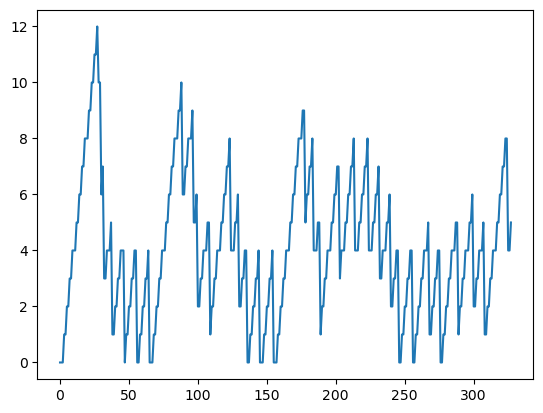

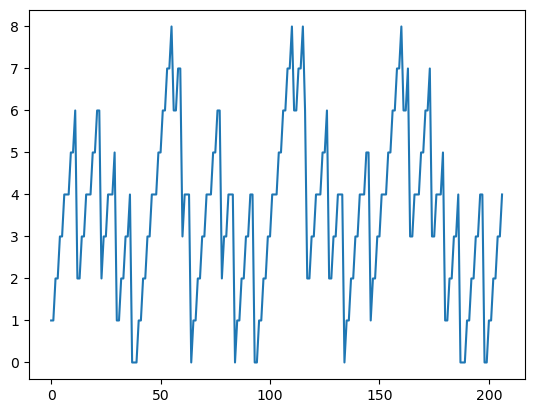

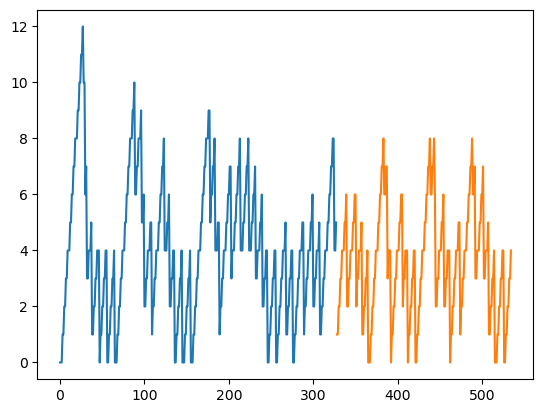

In [54]:
optimal(game1, well = "left")

tetris to burn ratio: 54 15
max height: 29
tetris indices and excess I pieces: 54 25
droughts:  [9, 13, 7, 10, 9, 18, 12, 5, 14, 3, 19, 17, 3, 11, 2, 8, 6, 15, 5, 7, 10, 8, 22, 3, 14, 1, 6, 26, 5, 9, 5, 6, 9, 7, 21, 1, 5, 39, 1, 6, 13, 10, 12, 4, 2, 9, 9, 14, 4, 14, 9, 5, 11]
mean, median and mode droughts:
9.679245283018869 9 9


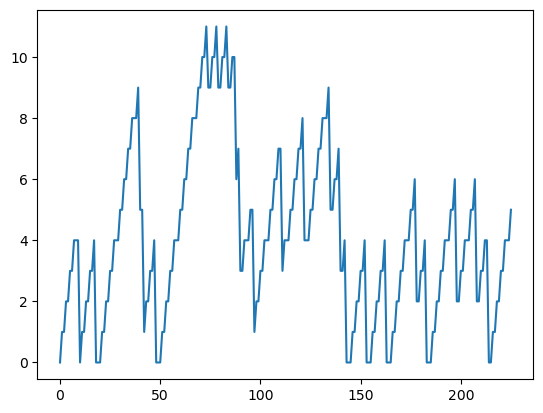

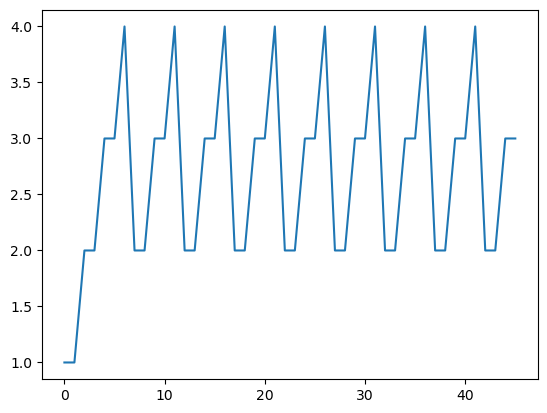

In [55]:
optimal(game2,19)

tetris to burn ratio: 64 51
max height: 29
tetris indices and excess I pieces: 64 81
droughts:  [6, 9, 26, 5, 2, 6, 7, 9, 11, 12, 6, 9, 17, 11, 1, 4, 9, 10, 8, 9, 16, 14, 2, 6, 12, 6, 12, 9, 10, 11, 6, 5, 8, 12, 15, 0, 16, 4, 10, 9, 9, 6, 10, 10, 8, 12, 10, 4, 13, 5, 12, 11, 6, 8, 11, 8, 9, 22, 99, 34, 74, 14, 39]
mean, median and mode droughts:
12.603174603174603 9 9


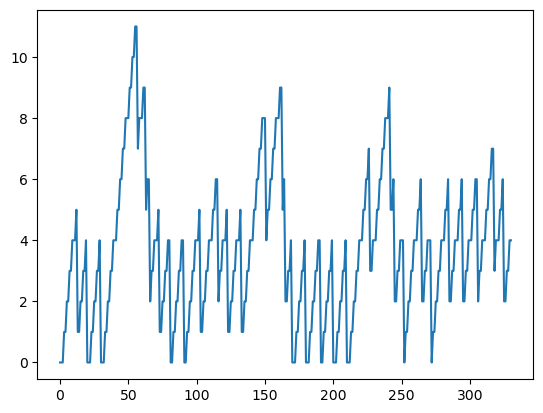

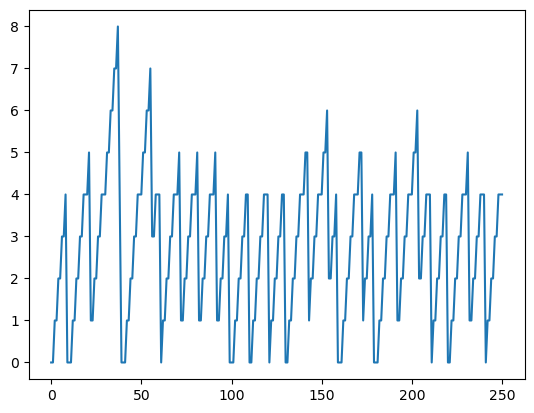

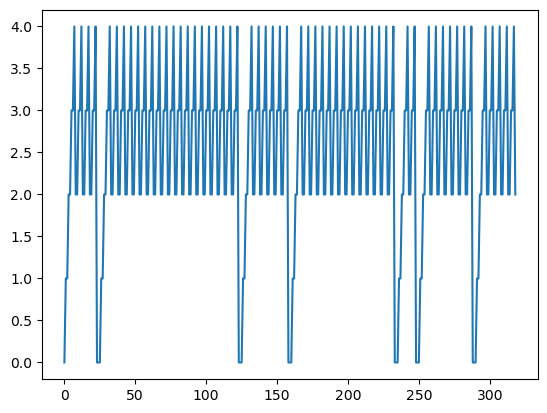

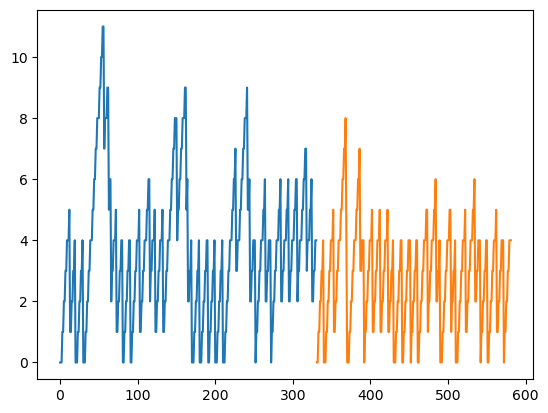

In [52]:
optimal(game3)

tetris to burn ratio: 53 2
max height: 19
tetris indices and excess I pieces: 53 23
droughts:  [5, 11, 8, 10, 12, 8, 9, 17, 1, 7, 15, 4, 8, 12, 3, 16, 12, 25, 5, 7, 8, 4, 1, 18, 13, 5, 5, 5, 15, 1, 12, 10, 7, 18, 5, 7, 8, 14, 6, 17, 2, 14, 2, 21, 2, 6, 16, 2, 10, 11, 10, 6]
mean, median and mode droughts:
9.153846153846153 8.0 5


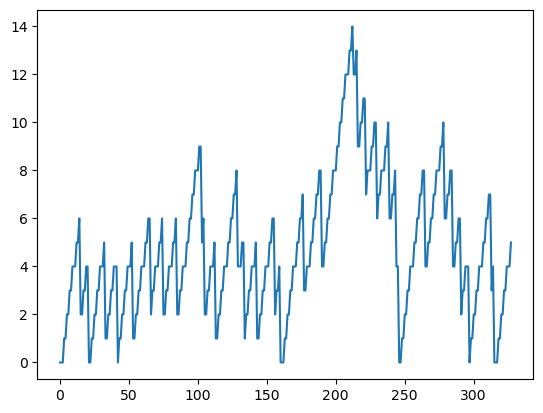

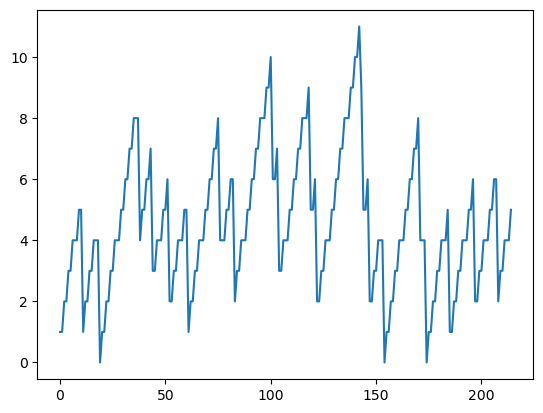

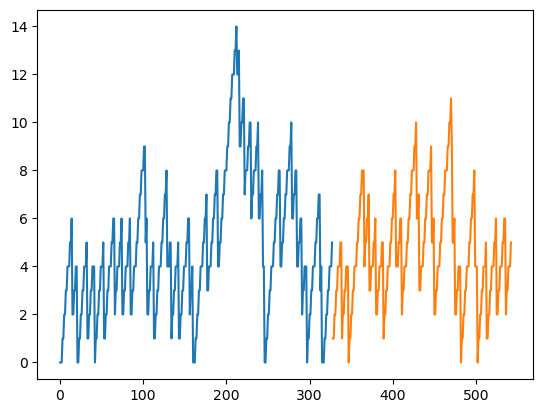

In [56]:
optimal(game4)